# Variables and inference

In [1]:
import pymc3 as pm
import arviz as az
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Unobserved random variables

Define an unobserved random variable in a context

$$ x \sim \mathrm{Normal}(\mu, \sigma) $$
$$ \mu = \mathrm{mean},\sigma = \mathrm{standard\ deviation} $$

In [2]:
with pm.Model() as model1:
    x = pm.Normal('x', mu=0, sigma=1)

## Observed random variables

Observed random variables are defined like unobserved random variables but require data to be passed into the `observed` argument

In [3]:
with pm.Model() as model2:
    obs = pm.Normal('obs', mu=x, sigma=1, observed=np.random.rand(100))

## Deterministic transforms

In [4]:
with pm.Model() as model3:
    squared_not_stored = x ** 2
    squared_stored = pm.Deterministic("squared_stored", x ** 2)

In [5]:
model1.free_RVs, model2.observed_RVs, model3.unobserved_RVs

([x ~ Normal], [obs ~ Normal], [squared_stored ~ Deterministic])

## Inference

In [6]:
with pm.Model():
    x = pm.Normal('x', mu=0, sigma=1)
    obs = pm.Normal('obs', mu=x, sigma=1, observed=np.random.randn(50_000))
    inf_data = pm.sample(2000, tune=1000, return_inferencedata=True, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [x]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 4 seconds.


In [7]:
print(inf_data)

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data


In [9]:
print(f'Time to sample {inf_data.sample_stats.sampling_time:.2f} seconds')

Time to sample 3.89 seconds


In [10]:
inf_data.posterior

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 2000)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999
Data variables:
    x        (chain, draw) float64 -0.001115 9.008e-05 ... -0.001537 -0.005205
Attributes:
    created_at:                 2021-02-28T06:24:47.103180
    arviz_version:              0.11.2
    inference_library:          pymc3
    inference_library_version:  3.11.1
    sampling_time:              3.8917932510375977
    tuning_steps:               1000

## Analyze results

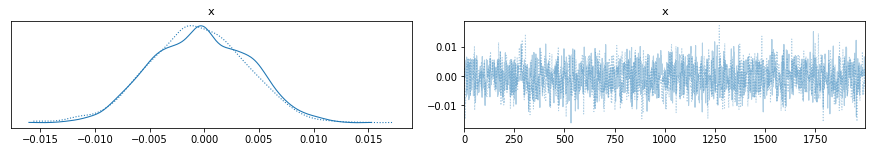

In [11]:
az.plot_trace(inf_data);

In [12]:
az.summary(inf_data)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-0.0,0.004,-0.009,0.008,0.0,0.0,1702.0,2818.0,1.0


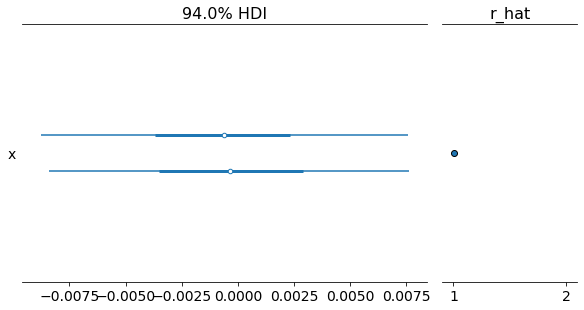

In [13]:
az.plot_forest(inf_data, r_hat=True);

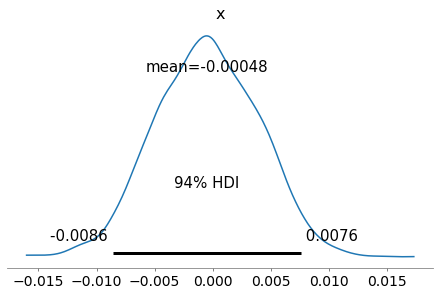

In [14]:
az.plot_posterior(inf_data);

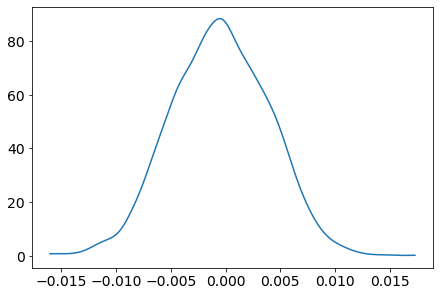

In [15]:
az.plot_dist(inf_data.posterior['x']);

## Posterior predictive sampling

TODO: add example from https://docs.pymc.io/notebooks/api_quickstart.html